# Angular Power Spectrum, Fisher Matrix and Constraints

In the present notebook, we model the Angular power spectrum of Galaxies, we calculate the Fisher matrix considering as free parameters the redshift uncertainty $\sigma_z$ and the matter density $\Omega_{m,0}$ and plot the confidence contours.

## Modeling the Angular Power Spectrum

Our first task is to model and plot the Angular Power Spectrum of galaxies, $C_\ell$. In our analysis we closely follow Asorey et. al. (2012) (arXiv: 1207.6487) and Crocce et. al. (2011) (arXiv: 1004.4640) . References to other papers are also given.

#### General discussion 

The 2D angular power spectrum in a shell $i$ is related to the 3D galaxy power spactrum through:

\begin{equation}
C_\ell^{ii} = \frac{2}{\pi} \int\, dk\, k^2 P_0(k) \Psi_\ell^2(k), \qquad (1)
\end{equation}

where $P_0(k)$ the present day (linear) matter power spectrum and $\Psi_\ell^i(k)$ is the $\bf{kernel}$ in real space, given by:

\begin{equation}
\Psi_\ell^i(k) = \int \, dz \,\phi_{i}(z)\, b(z)\, D(z) \, J_\ell(k r(z)). \qquad (2)
\end{equation}

In the above equation $b(z)$ is the (linear) bias, $D(z)$ the growth function, $J_\ell$ the bessel function and $r(z)$ the comoving distance to redshift $z$ given by:

\begin{equation}
r(z) = \int_0^z \, \frac{c}{H(z')}\, dz'; \qquad (3)
\end{equation}

finally $\phi_i(z)$ is known as the $\bf{radial\,\, selection\,\, function}$ and describes the probability to include a galaxy in the given redshift bin. We will discuss about it in a moment. The effects of photometric errors are included through the selection function.

Equation (1) does not account for the effects of redshift space distortions. In order to include them, we substitute $ \Psi_\ell^{i}  \to \Psi_\ell^{i} + \Psi_\ell^{r,i}$, where (Padmanabhan et. al. 2006, arXiv: astro-ph/0605302v2 ):

\begin{eqnarray}
\Psi_\ell^{i,r}(k) & = & \int dz \, \phi_i(z) \, f(z) \, D(z) \, \left[ \frac{2 \ell^2 + 2\ell - 1}{(2\ell + 3)(2\ell -1)} J_\ell(kr)\right. \\ \\  & - & \left. \frac{\ell(\ell - 1)}{(2\ell - 1)(2\ell + 1)}J_{\ell - 2}(kr) - \frac{(\ell +1)(\ell + 2)}{(2\ell +1)(2\ell + 3)}J_{\ell + 2}(kr) \right]. \qquad (4)
\end{eqnarray} 

This accounts for the Kaiser factor in our 2D case. In our first attempt to model the angular power spectrum, we will ignore this term, but we will include it in a full analysis later. 

#### Radial Selection Function

We now turn our focus into the radial selection function. Our discussion is again based (Asorey et. al. 2006), but also we use (Ma et. al. 2005, arXiv: astro-ph/0506614v1), (Cabre et. al. 2007, arXiv: astro-ph/0701393v1), (Hearin et. al. 2012, arXiv: 1111.0052v2), (Ma & Bernstein 2008, arXiv: 0712.1562v2). Also useful (Hearin et. al. 2010, arXiv: 1002.3383v2).

As we have said, the radial selection function describes the probability to include a galaxy in the given redshift bin we are interested in. Is the product of the galaxy redshift distribution and a window function:

\begin{equation}
\phi_i(z) = n(z) W_i(z), \qquad (5)
\end{equation}

where $n(z)$ the redshift distribution of galaxies $dN_g/dz$. More about this in a while.

In a spectroscopic survey, $W(z)$ is a top hat function, from the lower value to the maximum redshift value of the redshift bin i. 

In order to include the effects of redshift errors, the window function becomes:

\begin{equation}
W_i(z) = \int dz_p P(z_p|z)W_i(z_p) = \int_{z_p^{i, min}}^{z_p^{i, max}} \, dz_p  \,P(z_p|z), \qquad (6)
\end{equation}

where we have assumed a top-hat window function in photo-z bin.

Assuming now that the probability distribution function is gaussian:

\begin{equation}
p(z_p|z) = \frac{1}{\sqrt{2\pi}\sigma_z}\exp \left[ -\frac{1}{2} \frac{(z_p - z)^2}{\sigma_z^2} \right] \qquad (7)
\end{equation}

we get:

\begin{equation}
W_i(z) = \frac{1}{2}\left[\mbox{erf}(x_{max})- \mbox{erf}(x_{min}) \right], \qquad (8)
\end{equation}

where: $$\mbox{erf}(x) = \frac{1}{\sqrt{\pi}} \int_0^x e^{t^2} \,dt$$ is the error function and 

\begin{equation}
x_{min/max} \equiv \frac{z_p^{min/max} - z}{\sqrt{2}\sigma_z} \qquad (9)
\end{equation}

It would be nice to get a sence how different is this from a top hat. Thus, we will plot $W(z)$ for $\sigma_z = 0.01$ and $z_p^{min} = 0.30$,  $z_p^{max} = 0.50$. 

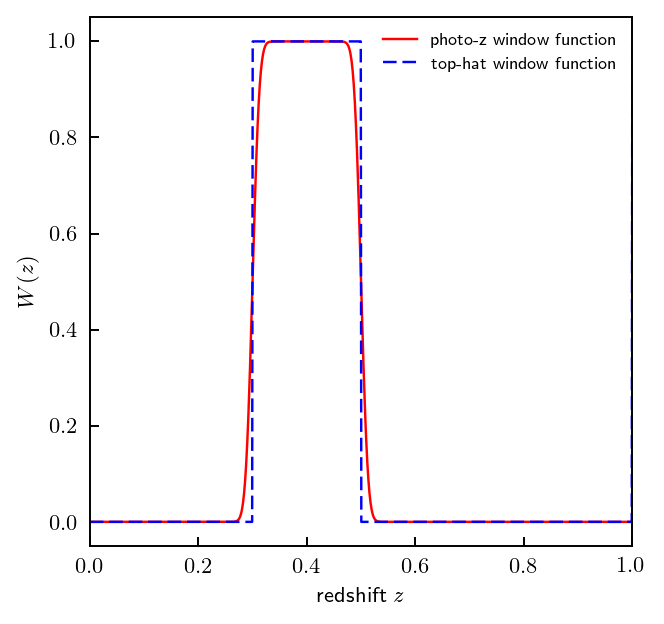

In [1]:
import numpy as np 
from scipy.special import erf
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline  
#=================================================

# Definition of boundaries in photo-z space 

z_min = 0.30
z_max = 0.50

#photo-z error 

sigma_z = 0.01
sigma_z1 = 0.04

#=================================================
# Definition of range of redshifts  and limits

z = np.linspace(0.0, 1.0, 1000)

x_min = (z_min - z)/(sigma_z*np.sqrt(2.0))
x_max = (z_max - z)/(sigma_z*np.sqrt(2.0))

#=================================================
# Calculation of the window function

Window = 0.5*(erf(x_max)-erf(x_min))

#Calculate also the top-hat window function, in order to overplot

top_hat = np.ones(1000)

for i in range (0,999):
    if ((z[i] < 0.3)or(z[i]>0.5)):
        top_hat[i] = 0.0

        
    
    
#================================================
#plot

plot_pretty() 
fig = plt.figure(figsize = (4,4))
plt.plot(z,Window, c='r', linewidth=1.0, label=r'photo-z window function')
plt.plot(z,top_hat, c='b', ls = '--', linewidth=1.0, label=r'top-hat window function')
plt.xlim(0.0,1.0)
#plt.ylim(1e1,5e4)

plt.xlabel("redshift $z$")
plt.ylabel("$W(z)$")





plt.legend(frameon=False, loc='upper right', fontsize=7)
plt.show()



We see that for a choise of $\sigma_z = 0.01$ the window function is very close to a top-hat window function. This changes for bigger errors (i.e. $\sigma_z = 0.04$). But in all cases, we see that the window function is non-zero only close to the redshift bin.

Now, we have to discuss the redshift distribution of galaxies. 

In most cases (see the papers mentioned above) the redshift distribution of galaxies is modeled as:

\begin{equation}
n(z) = \frac{d N_g}{dz}  \propto z^\alpha \exp\left[ - (z/z_0)^\beta \right], \qquad (10)
\end{equation}

In most cases (and this is what we are going to adopt here) $\alpha =2$ and $\beta = 1.5$. $z_0$ is determined/related to the median redshift of the distribution as (Cabre et. al. 2007) : $z_m = 1.412z_0$. The constant of proportionality in (10) is determined ny requaring that the total number of galaxies per unit solid angle is $N^A$:

\begin{equation}
N^A = \int_0^\infty dz\, n(z) , \qquad (11)
\end{equation}

For DES we have (Hearin et. al. 2010): $N^A = 15$ gal/arcmin$^2$. A frequently used value is $N^A = 30 $  gal/arcmin$^2$.

Although I have to be more careful about this, I will adopt here the formula presented in (Cabre et. al. 2007):

\begin{equation}
\frac{dN}{dz} = \frac{3}{2}\frac{z^2}{z_0^3}\exp\left[-\left(\frac{z}{z_0}\right)^{3/2} \right] \qquad (12)
\end{equation}

with $z_0 = 0.33$.

We will use this formula now, just as an approximation, to start writing our code. We have to further better examine and find an accurate formula later.

Let's start. The first thing we want to do is to plot is the kernel $\Psi_\ell^i(k)$ as a function of $k$ for a characteristic value of $\ell$, say $\ell = 10$. 

#### Kernel for $\ell = 10$

We will use equation (2) to calculate the kernel as a function of $k$, for a value of $\ell$, say $\ell = 10$. The integral formally goes from $0$ to $\infty$. But, as we saw before, the window function is practically zero for $z<0.2$ and $z>0.6$. Thus, taking the limits of the integral between 0 and 1 is a very good approximation.

For the bias $b(z)$, we will assume that it is constant and equal to 1.5, $b = 1.5$.

In [2]:
import scipy
from cosmolopy import *
import cosmolopy.perturbation as cp
import cosmolopy.distance as cd
from colossus.cosmology import cosmology
import pylab as pl
from scipy import interpolate 
from scipy import integrate


#===============================================================================

#Definition of cosmology - for cosmolopy

cosmo = {'omega_M_0' : 0.30,'omega_lambda_0' : 0.70 ,'omega_k_0':0.0,'omega_b_0' : 0.045,'omega_n_0' : 0.0, 'N_nu' : 0,'h' : 0.6726,'n' : 1.0,'sigma_8' : 0.867622,'baryonic_effects': True}

# ============================================================

# set cosmology parameters - for collosus 

params1 = {'flat': True, 'H0': 67.2, 'Om0': 0.30, 'relspecies': False, 'OL0':0.70 , 
          'Ob0': 0.045, 'sigma8': 0.867622, 'ns': 0.968, 'print_warnings': False}

cosmo1 = cosmology.setCosmology('mycosmo', params1 )

# ============================================================
# Define parameters that we are going to need

#bias
bias = 1.5 

#the z_0 mentioned in equation 12

z_0 = 0.30

In [3]:
# Now, in the range z from 0 to 1 -the integral will be between those limits- I have to calculate a few more things. 
# We have the window function from the previous section.

#===========================================
#First we need growth function

growth = cosmo1.growthFactor(z)

#Comoving distance as a function of redshift - in Mpc

com_dist = cd.comoving_distance(z, **cosmo)

# dN/dz using formula 2

dNdz = ((3.0/2.0)*(z**2.0)/(z_0**3.0))*np.exp(-(z/z_0)**1.5)

#selection function  = dN/dz*window function

sel_func = dNdz*Window

#prefactor

prefactor = bias*growth*sel_func
#===========================================
#Now it is easier to interpolate in order to get continous functions of z for the prefactor and the comoving distance 

prefact = interpolate.interp1d(z, prefactor)

comoving = interpolate.interp1d(z, com_dist)

#==============================================

//anaconda/envs/python2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
//anaconda/envs/python2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
//anaconda/envs/python2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is prob

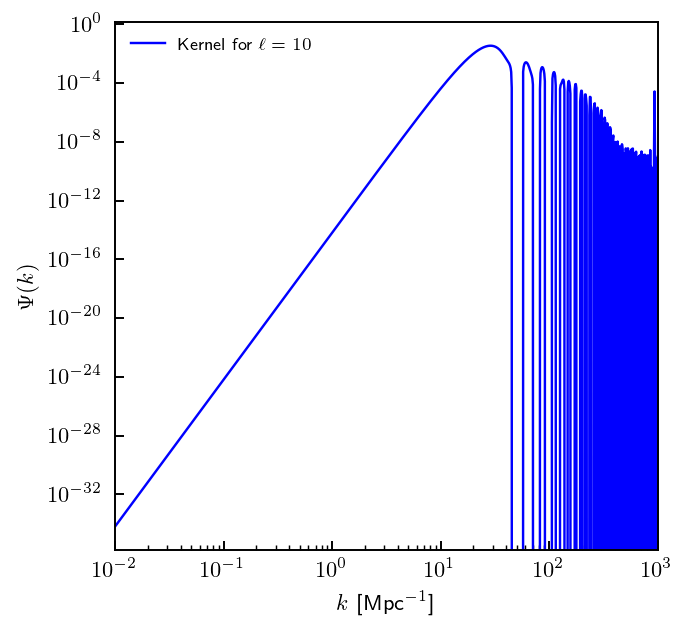

In [4]:
from scipy.special import spherical_jn
from scipy.integrate import quad

#define \ell such of that order of which you want to calculate the kernel

ell = 10


#====================================
# range in k - in 1/Mpc

klin = np.linspace(-2.0,3.0, 1000)
kval = np.power(10,klin)

#===================================

#Defines integrand

def integrand(x,k):
    return prefact(x)*spherical_jn(ell,x*k)


#Defines function that returns value of integral for each k

def kern_func(k):
    return quad(integrand, 0.101, 0.99, args=(k))[0]


#calculate kernel now - as a function of k

kernel = np.zeros(np.size(kval)) 

for i in range (0,np.size(kval)):
    kernel[i] = kern_func(kval[i])
    
    

plot_pretty() 
fig = plt.figure(figsize = (4,4))
plt.plot(kval,kernel, c='b', linewidth=1.0, label=r'Kernel for $\ell=10$')
plt.xlim(1e-2,1e3)
plt.xscale('log');plt.yscale('log')
#plt.ylim(1e1,5e4)

plt.xlabel("$k$ [Mpc$^{-1}$]")
plt.ylabel("$\Psi(k)$")





plt.legend(frameon=False, loc='upper left', fontsize=7)
plt.show()
    


### Τhe Limber Approximation

As we can see, the kernel exibits an oscillatory behavior for large $k$. Also, it's time consuming; remember that we have to calculate this kernel for each $\ell$. Probably the whole process is gonna be computationally expensive and unstable. 

Here we will use the Limber approximation in order to get a simpler formula for the angular power spectrum. The Limber approximation coincides with the exact solution for $\ell \gg 1$. Thus, when we will try to get an exact solution it will be a good test for our codes to see if the exact solution and the Limber approximation agree for large $\ell$.

I will not present the derivation here, but the approximation follows by approximating the spherical bessel function:

\begin{equation}
J_\ell(kr) \cong \sqrt{\frac{\pi}{2\ell+1}}\frac{1}{r} \delta_D\left(k - \frac{\ell + 1/2}{r} \right) \qquad (13)
\end{equation}

Substituting this to (1) and (2), we finally get, in the Limber approximation:

\begin{equation}
C_{\ell, Limber}^{ii} = \int dz \frac{\phi_i^2(z)D^2(z)b^2(z)}{r^2(z)\left|dr(z)/dz\right|}P\left(\frac{\ell+1/2} {r(z)}\right) \qquad (14)
\end{equation}

we will use eq. (14) to calculate $C_\ell$ for a range in $\ell$, say from $\ell = 1$ to $\ell = 1000$. 

Although we have defined most quantities above, we will redifine ecerything just for clarity.

//anaconda/envs/python2/lib/python2.7/site-packages/numpy/lib/function_base.py:2287: RuntimeWarning: overflow encountered in _vec_transfer_func (vectorized)
  outputs = ufunc(*inputs)


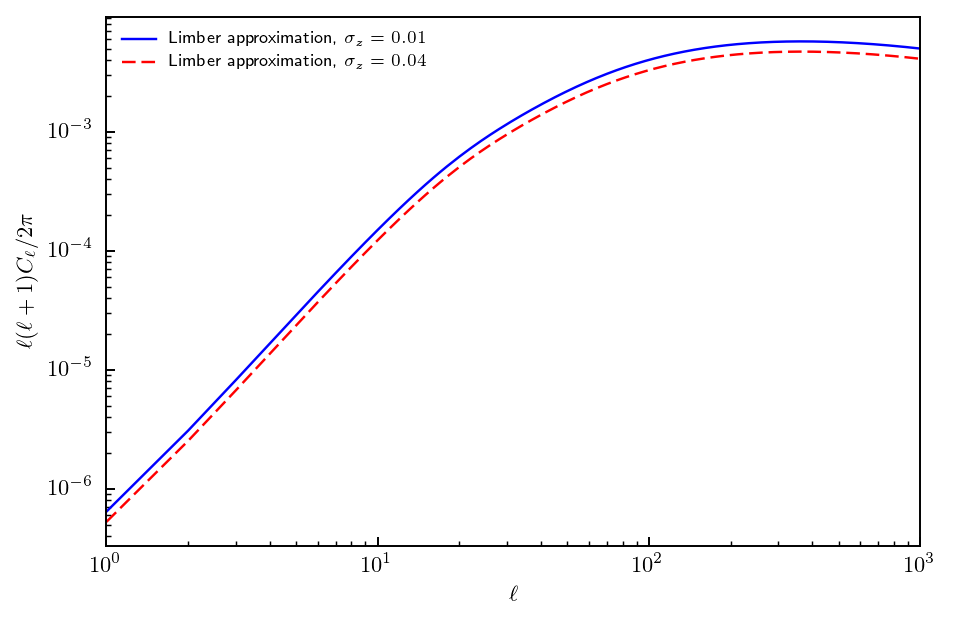

In [5]:
# Redifine range in z in order to avoid the case of low z

z = np.linspace(0.1, 1.0, 1000)

#===============================================
#Parameters for the prefactor

#comoving distance

com_dist = cd.comoving_distance(z, **cosmo)

# derivative of the comoving distance 

der_com = cd.comoving_integrand(z, **cosmo)

# bias - constant

bias = 1.5

# Growth factor

growth = cosmo1.growthFactor(z)

# dN/dz using formula 2

dNdz = ((3.0/2.0)*(z**2.0)/(z_0**3.0))*np.exp(-(z/z_0)**1.5)

#=================================================
# Calculation of the window function - again

x_min = (z_min - z)/(sigma_z*np.sqrt(2.0))
x_max = (z_max - z)/(sigma_z*np.sqrt(2.0))

Window = 0.5*(erf(x_max)-erf(x_min))

x_min1 = (z_min - z)/(sigma_z1*np.sqrt(2.0))
x_max1 = (z_max - z)/(sigma_z1*np.sqrt(2.0))

Window1 = 0.5*(erf(x_max1)-erf(x_min1))



#selection function  = dN/dz*window function

sel_func = dNdz*Window
sel_func1 = dNdz*Window1

#===========================================================

#Now, we can get the total prefactor of the integral

prefactorino = ((sel_func*bias*growth/com_dist)**2.0)/(np.absolute(der_com))
prefactorino1 = ((sel_func1*bias*growth/com_dist)**2.0)/(np.absolute(der_com))

#========================================
#Now it is easier to interpolate in order to get continous functions of z for the prefactor and the comoving distance 

prefact = interpolate.interp1d(z, prefactorino)
prefact1 = interpolate.interp1d(z, prefactorino1)



comoving = interpolate.interp1d(z, com_dist)

#==============================================
#Now, we will define the power spectrum on a grid and we will interpolate in 2D

#==============
#definition of present redshift in order to calculate the present day power spectrum
zlin = 0.001

#==============
# First creation of a grid to calculate the power spectrum

#we have range in z, let's define range in l

ell = np.arange(1.0, 1000.0)

zz, ll = np.meshgrid(z, ell)

# calculate the power spectrum on the grid

kk = (ll + 0.5)/comoving(zz)

power = cp.power_spectrum(kk, zlin, **cosmo)

#=======================================
#Now, interpolate to get the power spectrum for each value of z, l

power_spec = interpolate.interp2d(z, ell, power)


#=====================================================
#=====================================================
#=====================================================

#Integrand for the limber approxmation integral

def limber_integrand(x,l):
    return prefact(x)*power_spec(x, l)

def limber_integrand1(x,l):
    return prefact1(x)*power_spec(x, l)

# C_l's in the limber approximation

def limber_calculation(l):
    return quad(limber_integrand, 0.1001, 0.999, args=(l))[0]

def limber_calculation1(l):
    return quad(limber_integrand1, 0.1001, 0.999, args=(l))[0]


#=====================

#Now, calculate C_l for each l



C_limber = np.zeros(np.size(ell))
C_limber1 = np.zeros(np.size(ell))

for i in range (0, np.size(ell)):
    C_limber[i] = limber_calculation(ell[i])
    C_limber1[i] = limber_calculation1(ell[i])
    



#=======================
#plot
    

    

plot_pretty() 
fig = plt.figure(figsize = (6,4))
plt.plot(ell,(ell*(ell+1)/(2*np.pi))*C_limber, c='b', linewidth=1.0, label=r'Limber approximation, $\sigma_z = 0.01$')
plt.plot(ell,(ell*(ell+1)/(2*np.pi))*C_limber1, ls ='--', c='r', linewidth=1.0, label=r'Limber approximation, $\sigma_z = 0.04$')
plt.xlim(1.0,1000.0)
plt.xscale('log');plt.yscale('log')
#plt.ylim(1e1,5e4)

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_\ell/2\pi$")





plt.legend(frameon=False, loc='upper left', fontsize=7)
plt.show()
    
    


## Fisher Matrix Calculation

Now, we want to calculate the Fisher matrix for the angular power power spectrum. For parameters $\vec{\theta}$ the elements of the Fisher matrix are:

\begin{equation}
F_{ij} = \sum_{\ell_{min}}^{\ell_{max}} \, \frac{1}{\delta C_\ell^2} \frac{\partial C_\ell (\vec{\theta})}{\partial \theta_i} \frac{\partial C_\ell(\vec{\theta})}{\partial \theta_j}, \qquad (15)
\end{equation}

with:

\begin{equation}
\delta C_\ell \equiv \sigma(C_\ell) = \sqrt{\frac{2}{f_{sky}(2\ell + 1)}}\left(C_\ell + \frac{1}{\bar{n}} \right) \qquad (16)
\end{equation} 

We will take just two free parameters, $\Omega_{m,0}$ and $\sigma_z$. Fiducial values $\Omega_{m,0} = 0.3$ and $\sigma_z = 0.01$. Thus we have to calculate ($ 1 = \sigma_z$ and $2 = \Omega_{m,0}$):

\begin{equation} 
F_{11} = \sum \frac{1}{\delta C_\ell^2} \left(\frac{\partial C_\ell}{\partial \sigma_z} \right)^2, \qquad (17)
\end{equation}

\begin{equation}
F_{22} = \sum \frac{1}{\delta C_\ell^2} \left(\frac{\partial C_\ell}{\partial \Omega_{m,0}} \right)^2, \qquad (18)
\end{equation}

\begin{equation}
F_{12} = F_{21} =  \sum \frac{1}{\delta C_\ell^2} \frac{\partial C_\ell}{\partial \sigma_z} \frac{\partial C_\ell}{\partial \Omega_{m,0}} , \qquad (19)
\end{equation}

So, we first have to calculate the derivatives and the error in $C_\ell, \,\, \delta C_\ell$. I will use the Limber approximation everywhere. 

For the calculation of derivatives I will use the four point formula:

\begin{equation}
f'(x) = \frac{-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x + 2h)}{12h}, \qquad (20)
\end{equation} 




### Calculation of $\frac{\partial C_\ell}{\partial \sigma_z}$

I will use the same $z$ range and $\ell$ range I used before.

Also, many things -- linear power spectrum, growth factor, bias , comoving distance and its derivative , $dN/dz $ remain the same. The only thing that actually changes is the window function, and through this -- of course -- the $C_\ell$'s each time.

In [6]:
#define h 

h = sigma_z/100.0

#============================================================

# Here I define a function that for each value of sigma calculates the C_l's in the limber approximation
# Remember that actually the only thing that changes is the winow function

def C_sigma_var(l, sigmavar):
    
    #the first thing I have to do is to define the new limits for the window function
    
    x_minvar = (z_min - z)/(sigmavar*np.sqrt(2.0))
    x_maxvar = (z_max - z)/(sigmavar*np.sqrt(2.0))

    Windowvar = 0.5*(erf(x_maxvar)-erf(x_minvar))
    
    # having the window function, we can define a varying radial selection function
    
    sel_funcvar = dNdz*Windowvar
    
    # and thus the prefactor of the integral 
    
    prefactorino_var = ((sel_funcvar*bias*growth/com_dist)**2.0)/(np.absolute(der_com))
    
    #Now it is easier to interpolate in order to get continous functions of z for the prefactor 

    prefact_var = interpolate.interp1d(z, prefactorino_var)
    
    #Integrand for the limber approxmation integral - variable prefactor

    def limber_integrand_var(x,l):
        return prefact_var(x)*power_spec(x, l)
    
    # C_l's in the limber approximation

    
    return quad(limber_integrand_var, 0.1001, 0.999, args=(l))[0]

    
#===========================================================

# This function calculates numerically the derivative of  the power C_l with respect
# to the redshift uncertainty sigma_z

def numer_der_sigma(l):
    "gives the numerical derivative with respect to sigma_z for each l"
    
    f_1 = C_sigma_var(l, sigma_z + 2.0*h)
    f_2 = C_sigma_var(l, sigma_z + h)
    f_3 = C_sigma_var(l, sigma_z - h)
    f_4 = C_sigma_var(l, sigma_z - 2.0*h)
    
    derivative = (-f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    
    return derivative

#=======================================================
# calculate the derivative - with respect to sigma-  for each l

sigma_der = np.zeros(np.size(ell))

for i in range(0, np.size(ell)):
    sigma_der[i] = numer_der_sigma(ell[i])
    
    

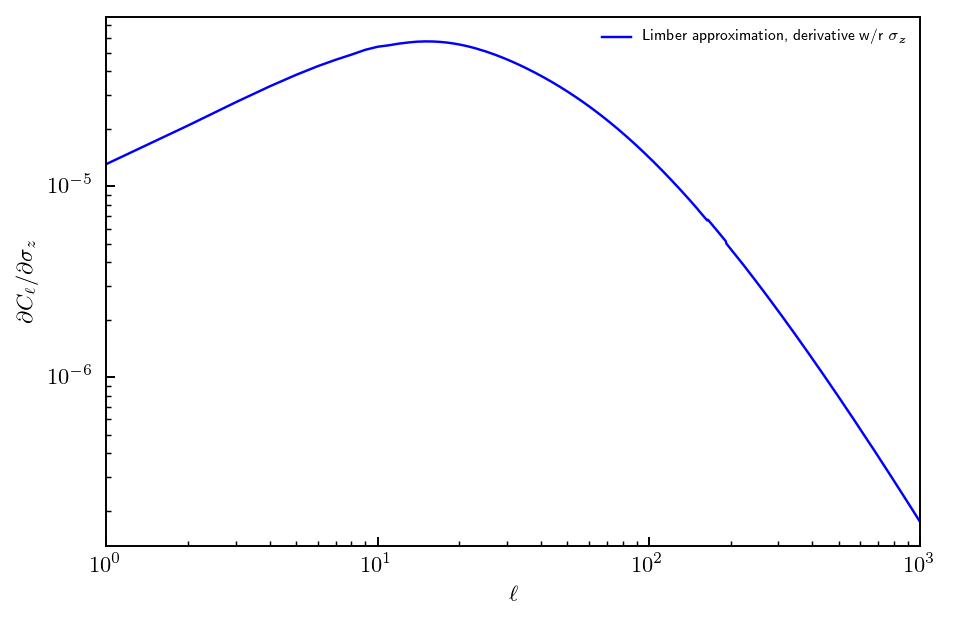

In [7]:
#Here let's plot the derivative, or actually  - the derivative because it is negative


plot_pretty() 
fig = plt.figure(figsize = (6,4))
plt.plot(ell, -sigma_der, c='b', linewidth=1.0, label=r'Limber approximation, derivative w/r $\sigma_z$')
plt.xscale('log');plt.yscale('log')
plt.xlim(1.0,1000.0)
#plt.ylim(1e1,5e4)

plt.xlabel("$\ell$")
plt.ylabel("$\partial C_\ell / \partial \sigma_z$")





plt.legend(frameon=False, loc='upper right', fontsize=6)
plt.show()
    

### Calculation of $\frac{\partial C_\ell}{\partial \Omega_{m,0}}$

Now we turn our attention to the second derivative we are going to need, the derivative of $C_\ell$ with respect to matter density.

The bias and selection function don't change. Everything else changes.

In [8]:
#Fiducial value of Omega_mu and step for the derivative

Omega_mu = 0.30

# step 

h = Omega_mu/1000.0

#============================================

def C_omega_var(l, omeg_var):
    "Return the for each l the  C_l for every l and for various values of omega matter"
    
    # Define cosmologies with variable Omega_mu 
    #=========================================================
    cosmovar = {'omega_M_0' : omeg_var,'omega_lambda_0' : 0.70 ,'omega_k_0': 1 -0.70 - omeg_var ,'omega_b_0' : 0.045,'omega_n_0' : 0.0, 'N_nu' : 0,'h' : 0.6726,'n' : 1.0,'sigma_8' : 0.867622,'baryonic_effects': True}
    #============================================================
    paramsvar1 = {'flat': False, 'H0': 67.2, 'Om0': omeg_var, 'relspecies': False, 'OL0':0.70 , 
          'Ob0': 0.045, 'sigma8': 0.867622, 'ns': 0.968, 'print_warnings': False}
    cosmovar1 = cosmology.setCosmology('mycosmo', paramsvar1 )
    #==============================================================
    #==============================================================
    #==============================================================
    
    # Calculation of parameters for the prefactor - and then the prefactor itsel , in the variable cosmology
    
    #comoving distance

    com_dist_var = cd.comoving_distance(z, **cosmovar)

    # derivative of the comoving distance 

    der_com_var = cd.comoving_integrand(z, **cosmovar)

    # bias - constant

    bias_var = 1.5

    # Growth factor - variable

    growth_var = cosmovar1.growthFactor(z)
    
    #==========
    #Define prefactor of the integral in the variable cosmology
    
    prefactorino_var_cosm = ((sel_func*bias_var*growth_var/com_dist_var)**2.0)/(np.absolute(der_com_var))
    
    #==============================================
    #Now it is easier to interpolate in order to get continous functions of z for the prefactor and the comoving distance 

    prefact_var_cosm = interpolate.interp1d(z, prefactorino_var_cosm)

    comoving_var = interpolate.interp1d(z, com_dist_var)
    
    #================================================
    #================================================
    # Now take the -linear- power spectrum in the variable cosmology 
    # since this gives the calculate for each l, there is no need to interpolate in 2d
    # we will interpolate in 1d - i.e. for each z
    
    k_var = (l + 0.5)/comoving_var(z) 
    
    power_var = cp.power_spectrum(k_var, zlin, **cosmovar)
    
    # Interpolate in 1d to get that for every value of z 
    
    power_spec_var = interpolate.interp1d(z, power_var)
    
    #========================================================================
    #========================================================================
    
    
    #Integrand for the limber approxmation integral - variable prefactor
    
    def limber_integrand_var_cosm(x):
        return prefact_var_cosm(x)*power_spec_var(x)
    
    # C_l's in the limber approximation
    
    return quad(limber_integrand_var_cosm, 0.1001, 0.999)[0]
    
    
#==================================================================================================
#==================================================================================================
#==================================================================================================

# This function calculates numerically the derivative of  the power C_l with respect
# to the matteer density, omega_mu

def numer_der_omega(l):
    "gives the numerical derivative with respect to omega_mu for each l"
    
    f_1 = C_omega_var(l, Omega_mu + 2.0*h)
    f_2 = C_omega_var(l, Omega_mu + h)
    f_3 = C_omega_var(l, Omega_mu - h)
    f_4 = C_omega_var(l, Omega_mu - 2.0*h)
    
    derivative = (-f_1 + 8.0*f_2 - 8.0*f_3 + f_4)/(12.0*h)
    
    return derivative

#=======================================================
# calculate the derivative - with respect to sigma-  for each l

omega_der = np.zeros(np.size(ell))

for i in range(0, np.size(ell)):
    omega_der[i] = numer_der_omega(ell[i])


    

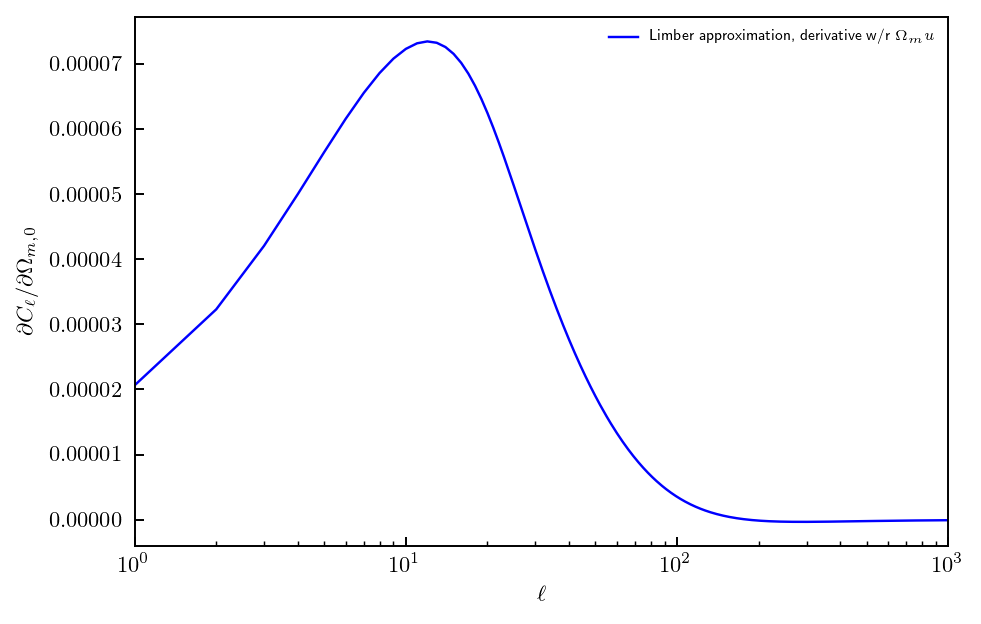

In [9]:
#Here let's plot the derivative


plot_pretty() 
fig = plt.figure(figsize = (6,4))
plt.plot(ell, -omega_der, c='b', linewidth=1.0, label=r'Limber approximation, derivative w/r $\Omega_mu$')
plt.xscale('log');#plt.yscale('log')
plt.xlim(1.0,1000.0)
#plt.ylim(1e-,1e-5)

plt.xlabel("$\ell$")
plt.ylabel("$\partial C_\ell / \partial \Omega_{m,0}$")





plt.legend(frameon=False, loc='upper right', fontsize=6)
plt.show()

### Calculation of $\delta C_\ell$

We will use formula (16) to calculate the error in the measurement of $C_\ell$.

We will need the parameters $f_{sky}$ (fraction of the sky covered) and $\overline{n}$ (the shot noise - galaxies per unit solid angle).

For DES, we will use the values:

$$ f_{sky} = 0.12$$
and
$$ \overline{n} = 15 \,\, gal/arcmin^2$$ (But remember to convert to steradians)

In [10]:
#Parameters 

# fraction of the sky
f_sky = 0.12

#shot noise 

# n in gal/arcming^2

n_arc = 15

#arcmins^2 to steradians

arcsq_to_ster = 8.4616e-8

#convert n to gal/ster 

n_ster = n_arc/arcsq_to_ster

#======================================
#Calculation of delta_C_l

delt_C_l = np.sqrt(2/(f_sky*(2.0*ell + 1.0)))*(C_limber + 1.0/n_ster)




### Calculation of the elements of the Fisher Matrix

Here we calculate the elements of the Fisher matrix using equations (17)-(19)

We will take as minimum $\ell_{min} = 20$ and maximum $\ell_{max} = 1000$ in the sum. We can change this later.


#### $F_{11}$

In [11]:
F_11_vect = (1.0/(delt_C_l**2.0))*(sigma_der**2.0)

F_11 = np.sum(F_11_vect[19:])

print("Element $F_{11}$ of the Fisher matrix is:")

print(F_11)

Element $F_{11}$ of the Fisher matrix is:
1580702.89055


#### $F_{22}$

In [12]:
F_22_vect = (1.0/(delt_C_l**2.0))*(omega_der**2.0)

F_22 = np.sum(F_22_vect[19:])

print("Element $F_{22}$ of the Fisher matrix is:")

print(F_22)

Element $F_{22}$ of the Fisher matrix is:
137098.466709


#### $F_{12} = F_{21}$ 

In [13]:
F_12_vect = (1.0/(delt_C_l**2.0))*(omega_der*sigma_der)

F_12 = np.sum(F_12_vect[19:])

print("Element $F_{12}=F_{21}$ of the Fisher matrix is:")

print(F_12)

Element $F_{12}=F_{21}$ of the Fisher matrix is:
-417640.312292


### Plotting Confidence Ellipses

Now, since we have the elemnts of the Fisher Matrix, we can plot the confidence ellipses

#### Fisher Matrix definition and inversion in order to get the covariance matrix

In [14]:
from numpy.linalg import inv

#Define the Fisher matrix

Fisher = np.array([[F_11, F_12], [F_12, F_22]])

# Define the covariance matrix, it is the inverse of the Fisher matrix

Covar = inv(Fisher)

#===================================

#### Use Chihway's code to get the ellipses

In [15]:
import numpy as np
import pylab as mplot
from numpy.linalg import inv
%pylab inline
import matplotlib
from code.plot_utils import plot_pretty
from matplotlib.patches import Ellipse
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]


def get_ellipse(fisher):
    
    
    smallC = inv(fisher)

    vals, vecs = eigsorted(smallC)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    return vals, theta

def plot_ellipse(vals, theta, color, label, nsigma):
    
    for i in range(nsigma):
        width, height = 2 * (i+1) * np.sqrt(vals)
        if i==(nsigma-1):
            ellip = Ellipse(xy=[0.01,0.30], width=width, height=height, angle=theta, facecolor='none', label=label, edgecolor=color)
        else:
            ellip = Ellipse(xy=[0.01,0.30], width=width, height=height, angle=theta, facecolor='none', edgecolor=color)
            
        mplot.gca().add_patch(ellip)
    
    return



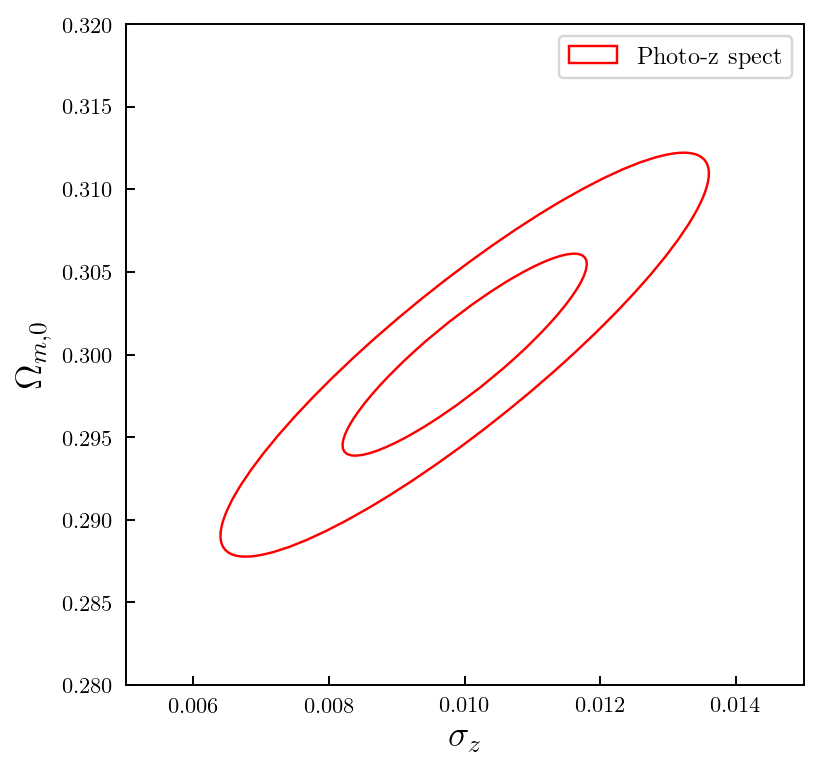

In [17]:
plot_pretty()
mplot.figure(figsize=(5,5))



vals, theta = get_ellipse(Fisher)
plot_ellipse(vals, theta, 'r', 'Photo-z spect', 2)

mplot.xlim(0.005,0.015)
mplot.ylim(0.28, 0.32 )
mplot.xlabel('$\sigma_z$', fontsize=15)
mplot.ylabel('$\Omega_{m,0}$', fontsize=15)
mplot.legend(fontsize=10)

mplot.savefig('Fisher_matr.png')